In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv("haberman.csv")
df = pd.DataFrame(data)
df

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [64]:
cols=[0,1,2]
df.drop(df.columns[cols],axis=1,inplace = True)
df.columns =['survival']
df

,survival
0,1
1,1
2,1
3,1
4,1
...,...
300,1
301,1
302,1
303,2


In [65]:

data = pd.read_csv("haberman.csv")
X = pd.DataFrame(data)
X.drop(X.columns[3],axis=1,inplace = True)
print(X)

     30  64   1
0    30  62   3
1    30  65   0
2    31  59   2
3    31  65   4
4    33  58  10
..   ..  ..  ..
300  75  62   1
301  76  67   0
302  77  65   3
303  78  65   1
304  83  58   2

[305 rows x 3 columns]


In [66]:
features = 3
w = np.zeros(features)
b = 0
R = []
for index in df.index:
    if df.loc[index,'survival']==2:
        df.loc[index,'survival']=-1

In [67]:
#Vanilla Perceptron
acc1=[] 
for j in range(100):
    acc = 0
    for i in range(304):
        a = np.dot(w,X.iloc[i])+b
        R.append(np.sign(a))
        
        if df.iloc[i]['survival']*a <=0:
            w += np.multiply(X.iloc[i],df.iloc[i]['survival'])
            b += df.iloc[i]['survival']
    
    for l in range(304):
        if np.sign(np.dot(w,X.iloc[l])+b)==df.iloc[l]['survival']:
            acc+=1
    acc1.append(acc)
    
    
print('The W matrix is:\n',w)  
print('B value is:',b)


The W matrix is:
 30   -150.0
64     29.0
1     -96.0
Name: 0, dtype: float64
B value is: 100


In [68]:
#voted perceptron
w = np.ones(3)
b = 0
R = []
c=1
acc2=[]
for j in range(100):
    b_voted = 0
    voted = 0
    acc = 0
    for i in range(304):
        a = np.dot(w,X.iloc[i])+b
        c+=1
        if df.iloc[i]['survival']*a <=0:
            voted += np.multiply(w,c)
            b_voted += np.multiply(b,c)
            c=1
            w += np.multiply(X.iloc[i],df.iloc[i]['survival'])
            b += df.iloc[i]['survival']
    for k in range(304):
        if np.sign(np.dot(w,X.iloc[k])+b)==df.iloc[k]['survival']:
            acc+=1
    acc2.append(acc)     
    
    w = voted/304
    b = b_voted/304

    
acc1 = [ x/3.04 for x in acc1]
acc2 = [ x/3.04 for x in acc2]    
    
print('The voted W matrix is:\n',w)
print('The voted b is:',b)





The voted W matrix is:
 30    8.657157e+13
64   -5.645028e+13
1    -2.320650e+13
Name: 6, dtype: float64
The voted b is: 12413182358145.61


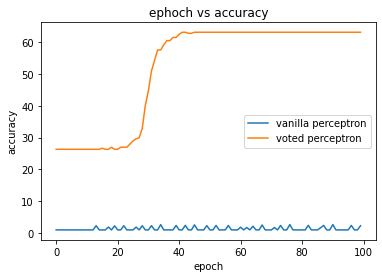

In [61]:

plt.title("ephoch vs accuracy")
plt.plot(np.arange(100), acc1, label = 'vanilla perceptron')
plt.plot(np.arange(100), acc2, label = 'voted perceptron')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()